# Day 1 Face Detection with OpenCV and Deep Learning
> Day 1 Face Detection with OpenCV and Deep Learning

- toc: true 
- badges: true
- comments: true
- categories: [ Deep Learning, Computer Vision]
- image: images/chart-preview.png

In [ ]:
#collapse-hide
# Convert jupyter notebook to python script:
#!jupyter nbconvert --to script file-name.ipynb
#$ python file-name.py --image01 image01.png  etc
# in ap.add_arrgument use : required = True + remove default path
#args = vars(ap.parse_args())

In [11]:
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt

In [6]:
# construct the argument parse and parse the arguments
#ap.add_argument('--name', '-n', default='foo', help='foo')
ap = argparse.ArgumentParser(description='Fooo')
ap.add_argument("-i", "--image",
                default = "images/face_detection05.jpg", required=False,# for *.py use required= True
    help="path to input image")
ap.add_argument("-p", "--prototxt", default = "models/deploy.prototxt.txt",
    help="path to Caffe 'deploy' prototxt file")
ap.add_argument("-m", "--model", default = "models/res10_300x300_ssd_iter_140000.caffemodel",#required=True,
    help="path to Caffe pre-trained model")
ap.add_argument("-c", "--confidence", type=float, default=0.20,
    help="minimum probability to filter weak detections")
args = vars(ap.parse_args([])) #for *.py use args = vars(ap.parse_args())

In [7]:
# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
print(h, w)

870 1315


In [8]:
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(args["prototxt"], args["model"])
print("...done")

[INFO] loading model...
...done


In [9]:
# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()
print("...done")

[INFO] computing object detections...
...done


True

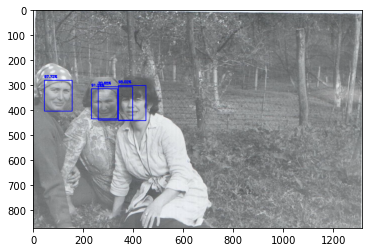

In [13]:
# loop over the detections
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > args["confidence"]:
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
 
        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),
            (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

# show the output image
plt.imshow(image)
cv2.imwrite("images/face_detection05_delme.jpg", image)
#cv2.waitKey(0)

In [ ]:
References:

> https: https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/

> https: https://realpython.com/command-line-interfaces-python-argparse/

> https: https://medium.com/@data.scientist/ipython-trick-how-to-use-argparse-in-ipython-notebooks-a07423ab31fc

> https: https://www.pyimagesearch.com/2018/03/12/python-argparse-command-line-arguments/